In [5]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)


In [6]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY')

In [7]:
display(data.describe())

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

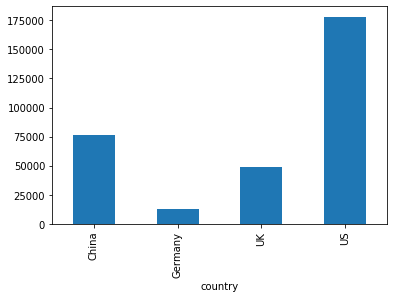

In [9]:
data.groupby('country').size().plot(kind='bar')

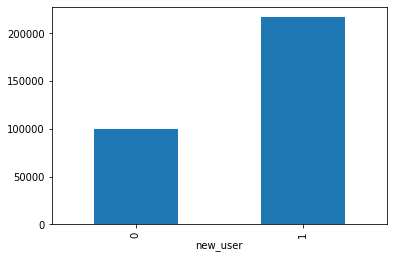

In [10]:
data.groupby('new_user').size().plot(kind='bar')

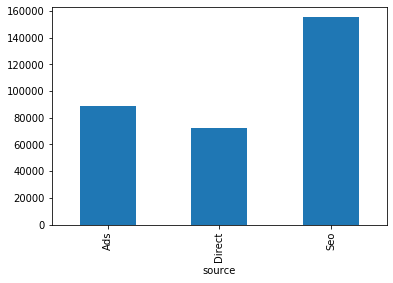

In [11]:
data.groupby('source').size().plot(kind='bar')

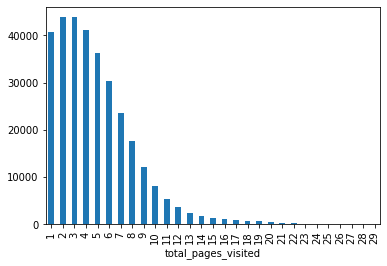

In [12]:
data.groupby('total_pages_visited').size().plot(kind='bar')

        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1


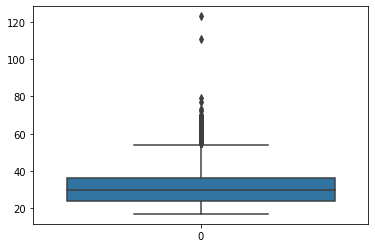

In [13]:
sns.boxplot(data=data['age'])
print(data[data['age'] > 100])

### Some observations
+ country: the majorty of users from US and China 

+ 68% are new users

+ user base is pretty young

+ users' ages of 111 and 123 seem unreallistic



In [14]:
data.drop(index=[90928,295581],inplace=True)

### sense of the data

1.the conversion rate is significantly low for Chinese users

2.new users' conversion rate is lower than the other

3.the conversion rate increases by the growth of total-page-visit

4.basically, the conversion rate decreases by the increase of users' age, however, the rate is slightly higher for the users with age around 60

### the conversion rate is different for age, country, new user and totoal_page_visited

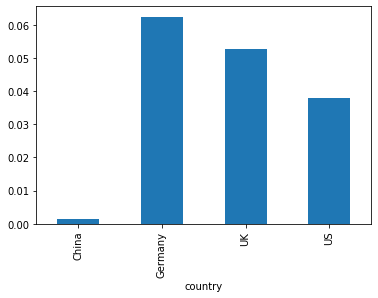

In [15]:
data.groupby(['country'])['converted'].mean().plot(kind='bar')

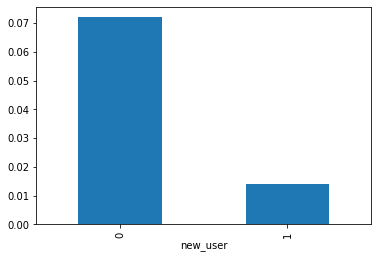

In [16]:
data.groupby(['new_user'])['converted'].mean().plot(kind='bar')

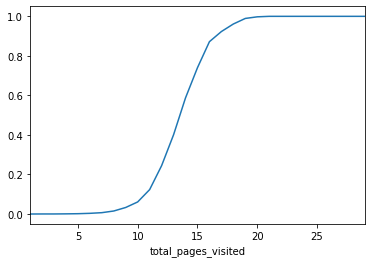

In [19]:
data.groupby(['total_pages_visited'])['converted'].mean().plot(kind='line')

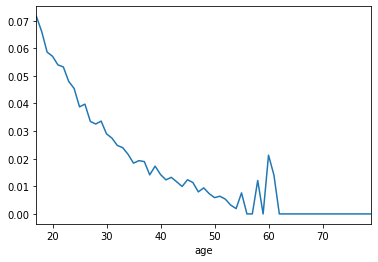

In [20]:
data.groupby(['age'])['converted'].mean().plot(kind='line')

In [21]:
 data_dummy = pd.get_dummies(data,drop_first=True)

#### This project is going to pick random forest to predict conversion rate for reasons below:

+ No need to do normalization and scaling when we use random forest

+ working well with both categorical and continues values

+ More stable compared with decistion tree

+ Higher accuracy and working well interms of overfitting


In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from numpy.core.umath_tests import inner1d

/Users/huangning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  """


In [23]:
X, y = data_dummy.drop(['converted'],axis=1),data_dummy['converted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.34,random_state=123)
rf = RandomForestClassifier(n_estimators=100,max_features=3, oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
print("OOB accuracy is",rf.oob_score_)

OOB accuracy is 0.9839762326896353


In [25]:
pd.DataFrame(confusion_matrix(y_train,rf.oob_decision_function_[:,1].round(), labels=[0, 1]))

,0,1
0,200744,1086
1,2258,4602


In [26]:
print("Test accuracy is",rf.score(X_test,y_test))

Test accuracy is 0.985024370279421


In [27]:
y_pred = rf.predict(X_test)

In [28]:
pd.DataFrame(confusion_matrix(y_test,y_pred, labels=[0, 1]))

,0,1
0,103624,546
1,1064,2274


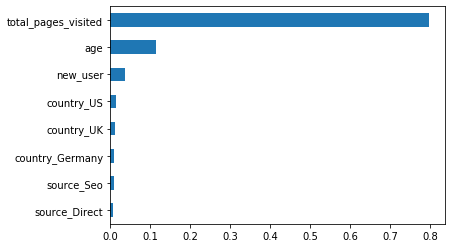

In [29]:
pd.Series(rf.feature_importances_,index=X_train.columns).sort_values().plot(kind='barh')


In [30]:
rf_drop_vist = RandomForestClassifier(n_estimators=100,max_features=3,oob_score=True,class_weight={0:1,1:10})
X_train_droped = X_train.drop(['total_pages_visited'],axis=1)
X_test_droped = X_test.drop(['total_pages_visited'],axis=1)
rf_drop_vist.fit(X_train_droped,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [31]:
print(rf_drop_vist.oob_score_)
pd.DataFrame(confusion_matrix(y_train,rf_drop_vist.oob_decision_function_[:,1].round(),labels=[0,1]))

0.8830034980114044


,0,1
0,181105,20725
1,3691,3169


In [32]:
rf_drop_vist.fit(X_test_droped,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [33]:
print(rf_drop_vist.score(X_test_droped,y_test))
y_pred = rf_drop_vist.predict(X_test_droped)
pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]))

0.9035513636194515


,0,1
0,95668,8502
1,1867,1471


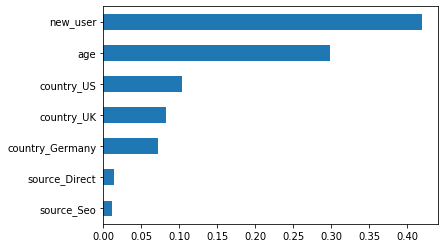

In [34]:
pd.Series(rf_drop_vist.feature_importances_,index=X_train_droped.columns).sort_values().plot(kind='barh')

In [35]:
from pdpbox import pdp, info_plots


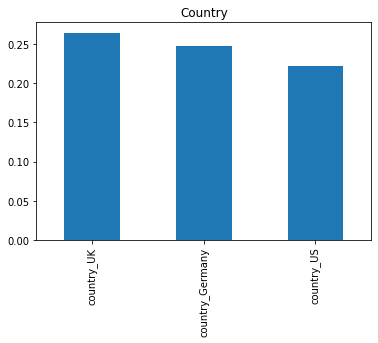

In [40]:
#country
pdp_iso = pdp.pdp_isolate(model=rf_drop_vist, 
                          dataset=X_train_droped,      
                          model_features=list(X_train_droped), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()


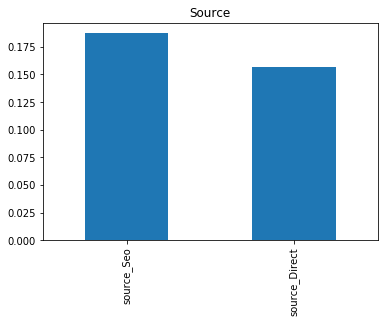

In [41]:
#source
pdp_iso = pdp.pdp_isolate(model=rf_drop_vist, 
                          dataset=X_train_droped,      
                          model_features=list(X_train_droped), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()


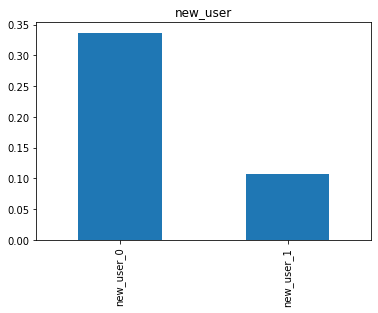

In [42]:
#new user
pdp_iso = pdp.pdp_isolate(model=rf_drop_vist, 
                          dataset=X_train_droped,      
                          model_features=list(X_train_droped), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='new_user')
plt.show()

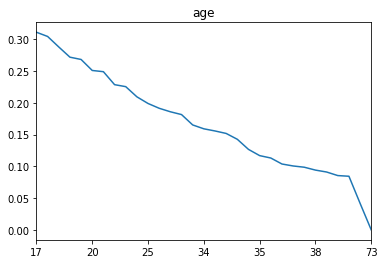

In [43]:
#age
pdp_iso = pdp.pdp_isolate(model=rf_drop_vist, 
                          dataset=X_train_droped,      
                          model_features=list(X_train_droped), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='line', title='age')
plt.show()

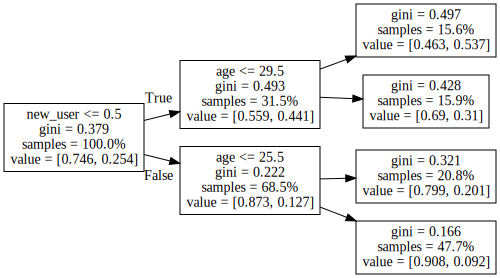

In [44]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
tree = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(X_train_droped, y_train)
  
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=X_train_droped.columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s
